# Convolution and Kernels 

Convolution: [1 2 2 1 0 0 0 0]


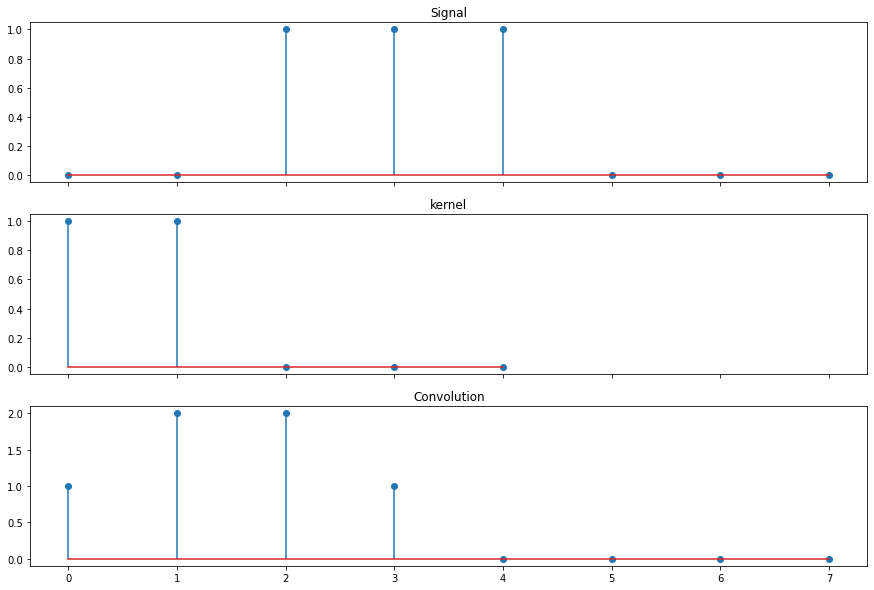

In [ ]:
import numpy as np
from scipy.signal import gaussian
import matplotlib.pyplot as plt


def convoluplot(signal, kernel):
    # sharex Controls sharing of properties among x (sharex) or y (sharey) axes
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)
    fig.set_figheight(10)
    fig.set_figwidth(15)
    # matplotlib.pyplot.stem create a  stem plot that draws lines perpendicular to a baseline at each location locs from the baseline to heads, and places a marker there. For vertical stem plots (the default), 
    # the locs are x positions, and the heads are y values. For horizontal stem plots, the locs are y positions, and the heads are x values.
    ax1.stem(signal, use_line_collection=True)
    ax1.set_title('Signal')
    ax2.stem(kernel, use_line_collection=True)
    ax2.set_title('kernel')
    filtered = np.convolve(signal, kernel, "same")
    ax3.stem(filtered, use_line_collection=True)
    ax3.set_title("Convolution")
    plt.show()

# different signals and kernels for readers to try
#signal = np.zeros(10)
#signal[0:5] = 1
#kernel = np.zeros(10)
#kernel[0:2] = 1
#convoluplot(signal, kernel)

signal = np.array([0, 0, 1, 1, 1, 0, 0, 0])
kernel = np.array([1, 1, 0, 0, 0])
# numpy.convolve Returns the discrete, linear convolution of two one-dimensional sequences. The convolution operator is often seen in signal processing, 
# where it models the effect of a linear time-invariant system on a signal [1]. 
# In probability theory, the sum of two independent random variables is distributed according to the convolution of their individual distributions.
# https://numpy.org/doc/stable/reference/generated/numpy.convolve.html
print("Convolution:", np.convolve(signal, kernel, "same"))

convoluplot(signal, kernel)

## 2D Images and Predefined Kernels for Edge Detection using Convolution

In [ ]:
!git clone https://github.com/SpringerNLP/Chapter6.git

Cloning into 'Chapter6'...
remote: Enumerating objects: 22, done.
remote: Total 22 (delta 0), reused 0 (delta 0), pack-reused 22
Unpacking objects: 100% (22/22), done.


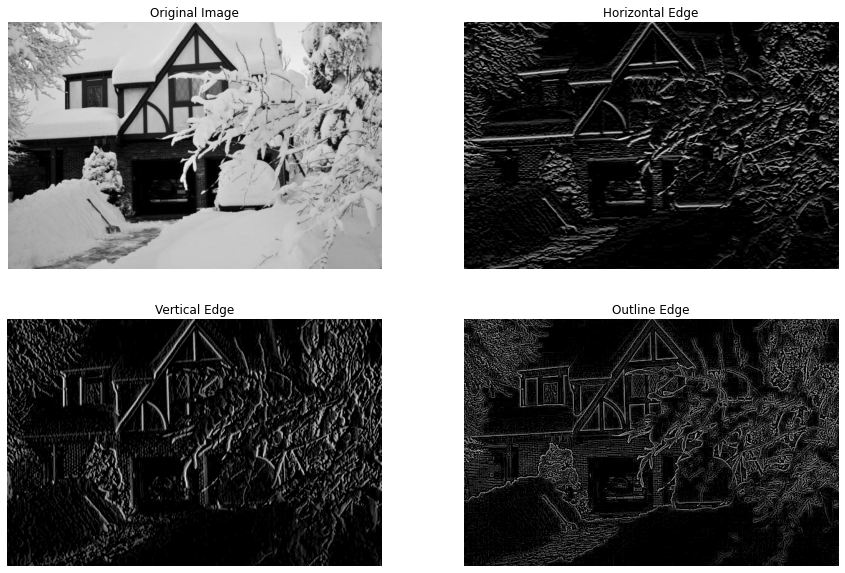

In [ ]:
import numpy as np
from PIL import Image
from scipy import misc
from skimage import data
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from skimage import io, color
import scipy.signal
from skimage import exposure

original_image = io.imread('Chapter6/figs/House.png')
grey_image = io.imread('Chapter6/figs/House.png', as_gray=True)

edge_kernel_horizontal = np.array([[-1, -1, -1],
                                   [0, 0, 0],
                                   [1, 1, 1]])
# scipy.signal.convolve2d Convolve two 2-dimensional arrays.
# valid option: The output consists only of those elements that do not rely on the zero-padding
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html
horizontal_edge_detection = scipy.signal.convolve2d(
    grey_image, edge_kernel_horizontal, 'valid')

# exposure.equalize_adapthist is Contrast Limited Adaptive Histogram Equalization (CLAHE).
# An algorithm for local contrast enhancement, that uses histograms computed over different tile regions of the image. Local details can therefore be enhanced even in regions that are darker or lighter than most of the image.
# clip_limit is the Clipping limit, normalized between 0 and 1 (higher values give more contrast).
# https://scikit-image.org/docs/stable/api/skimage.exposure.html#equalize-adapthist
horizontal_edges_equalized = exposure.equalize_adapthist(
    horizontal_edge_detection /
    # retrieve the max of the absolute value
    np.max(np.abs(horizontal_edge_detection)),
    clip_limit=0.03)

edge_kernel_vertical = np.array([[-1, 0, 1],
                                 [-1, 0, 1],
                                 [-1, 0, 1]])
vertical_edge_detection = scipy.signal.convolve2d(
    grey_image, edge_kernel_vertical, 'valid')
vertical_edges_equalized = exposure.equalize_adapthist(
    vertical_edge_detection /
    np.max(
        np.abs(vertical_edge_detection)),
    clip_limit=0.03)

edge_kernel_outline = np.array([[-1, -1, -1],
                                [-1, 8, -1],
                                [-1, -1, -1]])
outline_edge_detection = scipy.signal.convolve2d(
    grey_image, edge_kernel_outline, 'valid')
outline_edges_equalized = exposure.equalize_adapthist(
    outline_edge_detection /
    np.max(
        np.abs(outline_edge_detection)),
    clip_limit=0.03)


f, ax_array = plt.subplots(2, 2)
f.set_figheight(10)
f.set_figwidth(15)
ax_array[0, 0].imshow(original_image)
ax_array[0, 0].set_title('Original Image')
ax_array[0, 0].axis('off') # turn off axis
ax_array[0, 1].imshow(horizontal_edges_equalized, cmap=plt.cm.gray)
ax_array[0, 1].set_title('Horizontal Edge')
ax_array[0, 1].axis('off')
ax_array[1, 0].imshow(vertical_edges_equalized, cmap=plt.cm.gray)
ax_array[1, 0].set_title('Vertical Edge')
ax_array[1, 0].axis('off')
ax_array[1, 1].imshow(outline_edges_equalized, cmap=plt.cm.gray)
ax_array[1, 1].set_title('Outline Edge')
ax_array[1, 1].axis('off')
plt.show()


